# **Challenge for “Merit Prize” 2024/2025**
##### Grupo 41
##### Raquel Rodrigues (NºIST 106322) e Leonor Figueira (NºIST 106157)

##### NÃO ESQUECER:

the target variable indicated is changed to “malignant" instead of  "has the client subscribed to a term deposit".

#### Pergunta 1)

In [2]:
from sklearn import datasets

# Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target  # The target is already in [0, 1] format

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create StratifiedShuffleSplit cross-validation (with stratification)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform logistic regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict on training data and calculate accuracy
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

print(f"Accuracy on training data of logistic regression model: {train_accuracy:.5f}")

# Predict on test data and calculate accuracy
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Accuracy on testing data of logistic regression model: {test_accuracy:.5f}")


Accuracy on training data of logistic regression model: 0.95980
Accuracy on testing data of logistic regression model: 0.97661


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales the data and then fits the Logistic Regression model
model = make_pipeline(StandardScaler(), LogisticRegression())

# Evaluate with cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print(f"Cross-validated accuracy: {scores.mean():.5f} ± {scores.std():.5f}")


Cross-validated accuracy: 0.98246 ± 0.01046


#### Pergunta 2)

In [8]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Silhouette scores: [0.3555006815704848, 0.3446779915028074, 0.13923935320243294, 0.1365569936953837, 0.11943805382362807, 0.08794301704192488, 0.07834574037055249, 0.07212811694181119, 0.09401785785373973, 0.09851453592992197, 0.0861659628401115]
Spearman correlation: -0.7909, P-value: 0.0037


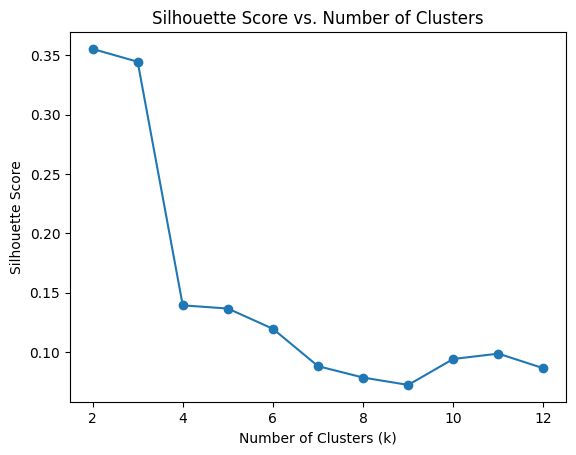

Optimal number of clusters (k) 2


In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import spearmanr

# Range of cluster numbers to evaluate
k_values = range(2, 13)  # Start with 2 clusters, up to 12 clusters
silhouette_scores = []

# Initialize the scaler
scaler = StandardScaler()                               # USAR?
X_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data

# Perform EM clustering for different k
for k in k_values:

    # Initialize and fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, init_params='random_from_data', n_init=3, random_state=42)        # init_params = ?, n_init = ?
    gmm.fit(X_scaled)
    
    # Predict cluster labels
    cluster_labels = gmm.predict(X_scaled)
    
    # Evaluate Silhouette Score
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)
    

# Find the optimal k
optimal_k = k_values[np.argmax(silhouette_scores)]

print("Silhouette scores:", silhouette_scores)      # Debug

spearman_corr, spearman_p_value = spearmanr(k_values, silhouette_scores)
print(f"Spearman correlation: {spearman_corr:.4f}, P-value: {spearman_p_value:.4f}")

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


print("Optimal number of clusters (k)", optimal_k)



...

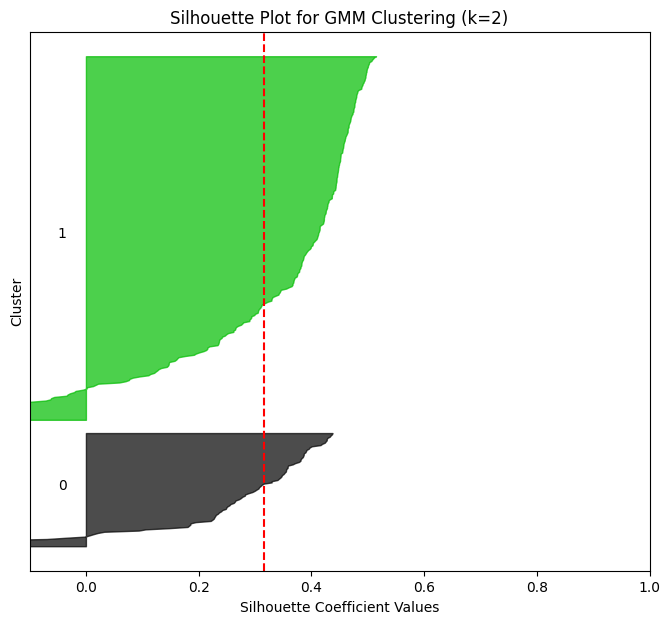

In [22]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Initialize and fit GMM for the optimal k
gmm = GaussianMixture(n_components=optimal_k, init_params='random_from_data', n_init=1, random_state=42)    # init_params = ?, n_init = ?
gmm.fit(X_scaled)
cluster_labels = gmm.predict(X_scaled)

# Calculate silhouette scores for each sample
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Plot the silhouette
fig, ax1 = plt.subplots(1, 1, figsize=(8, 7))

y_lower = 10  # Starting position for the silhouette plots
for i in range(optimal_k):
    # Extract silhouette scores for the current cluster
    cluster_silhouette_values = silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()  # Sort for better visualization

    cluster_size = cluster_silhouette_values.shape[0]
    y_upper = y_lower + cluster_size

    # Color map for the silhouette plots
    color = cm.nipy_spectral(float(i) / optimal_k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * cluster_size, str(i))  # Add cluster labels
    y_lower = y_upper + 10  # Add spacing between plots

# Add average silhouette score as a vertical line
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_title(f"Silhouette Plot for GMM Clustering (k={optimal_k})")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster")
ax1.set_yticks([])  # Remove y-axis ticks for clarity
ax1.set_xlim([-0.1, 1])  # Silhouette values range from -1 to 1
plt.show()

#### Pergunta 3)

In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Range of possible k-values (number of clusters)
k_values = range(2, 13)  # Example: k-values from 1 to 12

# Initialize an empty list to store probabilities for each k
train_prob_clusters = {}
test_prob_clusters = {}

# Loop through different k-values to train GMM and get probabilities
for k in k_values:
    # Fit the Gaussian Mixture Model (GMM) with k clusters
    em_model = GaussianMixture(n_components=k, random_state=42)
    em_model.fit(X_train)
    
    # Map the training and test sets into probability values of the clusters
    train_probabilities = em_model.predict_proba(X_train)
    test_probabilities = em_model.predict_proba(X_test)
    
     # Store the probabilities for train and test sets for this k-value
    train_prob_clusters[k] = train_probabilities
    test_prob_clusters[k] = test_probabilities

print(test_prob_clusters)

{2: array([[8.45317965e-013, 1.00000000e+000],
       [1.00000000e+000, 7.98725997e-101],
       [9.99999903e-001, 9.74364029e-008],
       [4.79691619e-023, 1.00000000e+000],
       [3.29595693e-028, 1.00000000e+000],
       [1.00000000e+000, 5.15118097e-058],
       [1.00000000e+000, 1.05400216e-207],
       [1.00000000e+000, 3.58578868e-013],
       [1.00000000e+000, 1.08956508e-014],
       [5.37102624e-011, 1.00000000e+000],
       [2.38594015e-010, 1.00000000e+000],
       [1.00000000e+000, 5.87241433e-017],
       [4.51319532e-006, 9.99995487e-001],
       [5.93434266e-001, 4.06565734e-001],
       [3.97311911e-011, 1.00000000e+000],
       [1.00000000e+000, 1.16758100e-041],
       [6.60425533e-007, 9.99999340e-001],
       [1.49677648e-058, 1.00000000e+000],
       [1.74792741e-112, 1.00000000e+000],
       [1.00000000e+000, 6.27211373e-096],
       [8.38060972e-005, 9.99916194e-001],
       [1.28295310e-016, 1.00000000e+000],
       [1.00000000e+000, 3.42801970e-171],
       

#### Pergunta 4)

In [26]:
for k in k_values:
    
    # Now, perform Logistic Regression on the mapped test data
    log_reg = LogisticRegression(max_iter=10000)
    
    # Train Logistic Regression on the probability values (i.e., the mapped data from GMM)
    log_reg.fit(train_prob_clusters[k], y_train)
    
    # Make predictions using the Logistic Regression model
    y_pred = log_reg.predict(test_prob_clusters[k])
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy for this k-value
    print(f"Accuracy of Logistic Regression with k={k}: {accuracy:.5f}")

Accuracy of Logistic Regression with k=2: 0.92398
Accuracy of Logistic Regression with k=3: 0.93567
Accuracy of Logistic Regression with k=4: 0.89474
Accuracy of Logistic Regression with k=5: 0.89474
Accuracy of Logistic Regression with k=6: 0.88304
Accuracy of Logistic Regression with k=7: 0.87719
Accuracy of Logistic Regression with k=8: 0.87719
Accuracy of Logistic Regression with k=9: 0.90643
Accuracy of Logistic Regression with k=10: 0.91228
Accuracy of Logistic Regression with k=11: 0.88304
Accuracy of Logistic Regression with k=12: 0.90643


#### Pergunta 5)

#### Pergunta 6)